In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries for Predictive Analytics step
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(loss))
    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [ ]:
# Create a variable for store our data folder's path
ROOT = '/content/drive/MyDrive/10 big cats of the wild kaggle dataset'

In [ ]:
# Inspect our data folder
for dir_name, folder_names, file_names in os.walk(ROOT):
    print(f"There is {len(folder_names)} folders and {len(file_names)} files in {dir_name}")

There is 3 folders and 4 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset
There is 10 folders and 1 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/AFRICAN LEOPARD
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/CHEETAH
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/JAGUAR
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/TIGER
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/LIONS
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/CLOUDED LEOPARD
There is 0 folders and 5 files in /content/drive/MyDrive/10 big cats of the wild kaggle dataset/test/PUMA
There is 0 folders and 5 files 

In [ ]:
#Create train, validation and test directory
train_dir = ROOT + '/train/'
valid_dir = ROOT + '/valid/'
test_dir = ROOT + '/test/'

In [ ]:
# Create train, validation and test datasets
tf.random.set_seed(42)
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
print("Create train dataset...")
train_data = image_dataset_from_directory(directory=train_dir,
                                         image_size=IMAGE_SHAPE,
                                         batch_size=BATCH_SIZE,
                                         label_mode='categorical')
print("Create validation dataset...")
valid_data = image_dataset_from_directory(directory=valid_dir,
                                         image_size=IMAGE_SHAPE,
                                         batch_size=BATCH_SIZE,
                                         label_mode='categorical')
print("Create test dataset...")
test_data = image_dataset_from_directory(directory=test_dir,
                                         image_size=IMAGE_SHAPE,
                                         batch_size=BATCH_SIZE,
                                         label_mode='categorical')

Create train dataset...
Found 2339 files belonging to 10 classes.
Create validation dataset...
Found 50 files belonging to 10 classes.
Create test dataset...
Found 50 files belonging to 10 classes.


In [ ]:
# Inspect our train dataset
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Inspect our validation dataset
valid_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
# Inspect our labels
train_data.class_names

['AFRICAN LEOPARD',
 'CARACAL',
 'CHEETAH',
 'CLOUDED LEOPARD',
 'JAGUAR',
 'LIONS',
 'OCELOT',
 'PUMA',
 'SNOW LEOPARD',
 'TIGER']

In [ ]:
# Get a single batch for example
for image, label in train_data.take(1):
    print(image, label)

tf.Tensor(
[[[[104. 106. 105.]
   [107. 109. 108.]
   [111. 111. 111.]
   ...
   [ 99.  99.  97.]
   [ 98.  98.  98.]
   [102. 102. 102.]]

  [[105. 107. 106.]
   [111. 113. 112.]
   [113. 113. 113.]
   ...
   [111. 111. 109.]
   [109. 109. 109.]
   [109. 109. 109.]]

  [[110. 112. 111.]
   [114. 116. 115.]
   [113. 115. 114.]
   ...
   [123. 123. 121.]
   [119. 121. 120.]
   [114. 116. 115.]]

  ...

  [[ 73.  72.  51.]
   [ 71.  70.  49.]
   [ 79.  78.  58.]
   ...
   [136. 128. 126.]
   [149. 140. 135.]
   [150. 139. 133.]]

  [[138. 141. 124.]
   [137. 140. 123.]
   [124. 126. 112.]
   ...
   [143. 138. 132.]
   [154. 145. 136.]
   [168. 158. 148.]]

  [[145. 149. 134.]
   [158. 162. 147.]
   [163. 167. 153.]
   ...
   [152. 147. 141.]
   [169. 161. 150.]
   [181. 171. 159.]]]


 [[[154. 194. 194.]
   [155. 195. 195.]
   [160. 196. 196.]
   ...
   [161. 168. 134.]
   [160. 167. 133.]
   [158. 165. 131.]]

  [[155. 193. 194.]
   [156. 195. 194.]
   [159. 195. 195.]
   ...
   [159. 1

In [ ]:
# Create a model with transfer learning, with EfficientNetB0 and feature extraction

# Set the random seed
tf.random.set_seed(42)
# Create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Create inputs
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')
# Pass inputs to the base model
x = base_model(inputs)
# Create pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name='pooling_layer')(x)
# Create outputs
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
# Create an instance of our model
model_0 = tf.keras.Model(inputs, outputs)
# Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
# Fit the model
history_0 = model_0.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
74/74 [==============================] - 259s 3s/step - loss: 0.9656 - accuracy: 0.8119 - val_loss: 0.4039 - val_accuracy: 0.9400
Epoch 2/5
74/74 [==============================] - 7s 83ms/step - loss: 0.3270 - accuracy: 0.9444 - val_loss: 0.2455 - val_accuracy: 0.9000
Epoch 3/5
74/74 [==============================] - 6s 74ms/step - loss: 0.2238 - accuracy: 0.9590 - val_loss: 0.1864 - val_accuracy: 0.9400
Epoch 4/5
74/74 [==============================] - 6s 77ms/step - loss: 0.1829 - accuracy: 0.9619 - val_loss: 0.1623 - val_accuracy: 0.9400
Epoch 5/5
74/74 [==============================] - 6s 73ms/step - loss: 0.1592 - accuracy: 0.9675 - val_loss: 0.1339 - val_accuracy: 0.9600


<Axes: >

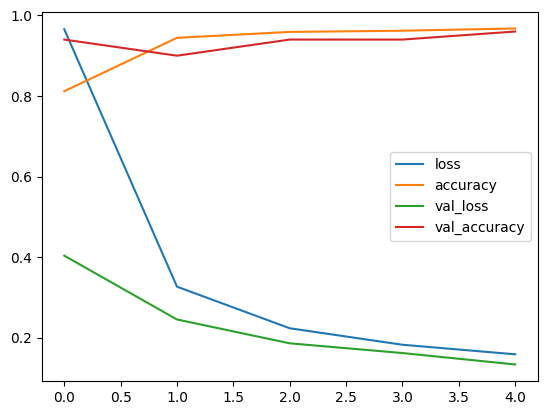

In [ ]:
# Plot history_0
pd.DataFrame(history_0.history).plot()

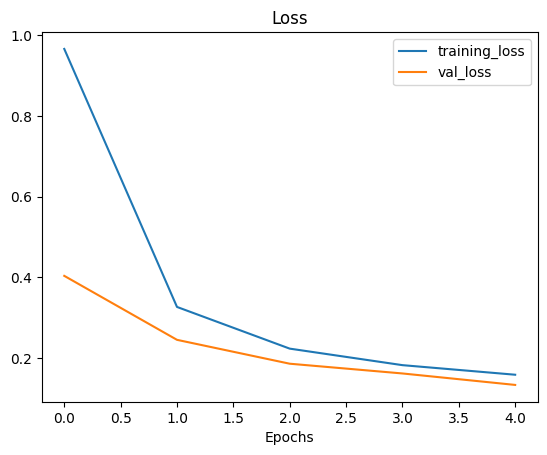

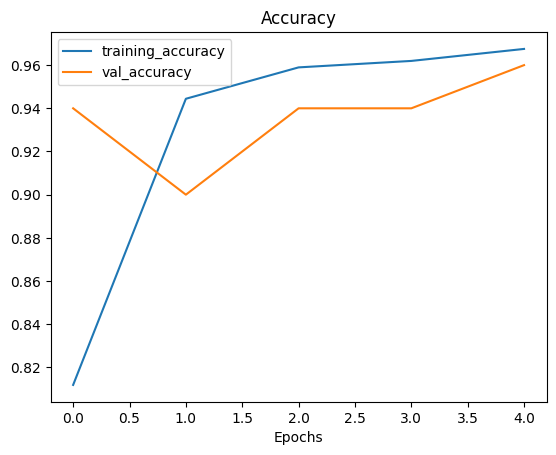

In [ ]:
# Plot loss and accuracy separately
plot_loss_curve(history_0)

In [ ]:
# Evaluate on test data
model_0.evaluate(test_data)

2/2 [==============================] - 5s 58ms/step - loss: 0.0815 - accuracy: 1.0000


[0.08149375766515732, 1.0]

In [ ]:
# Best Model export for deployment
import pickle
# save the model to disk
model_filename = 'best_image_model.h5'
pickle.dump(model_0, open(model_filename, 'wb'))

In [ ]:
# check by Reloading saved model from disk using load function of pickle
with open('/content/best_image_model.h5','rb') as file:
    loaded_model = pickle.load(file)
# Validate the accuracy of the loaded model on the test data
loss, accuracy = loaded_model.evaluate(test_data)
print(str(model_0.evaluate(test_data)))


TypeError: ignored